In [1]:
import pandas as pd 
import numpy as np
from sklearn.feature_selection import SelectKBest , f_classif , chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings("ignore", category=ConvergenceWarning) 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, chi2_contingency
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv("C:\\Users\\admin\\Desktop\\bank.csv", sep = ';')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

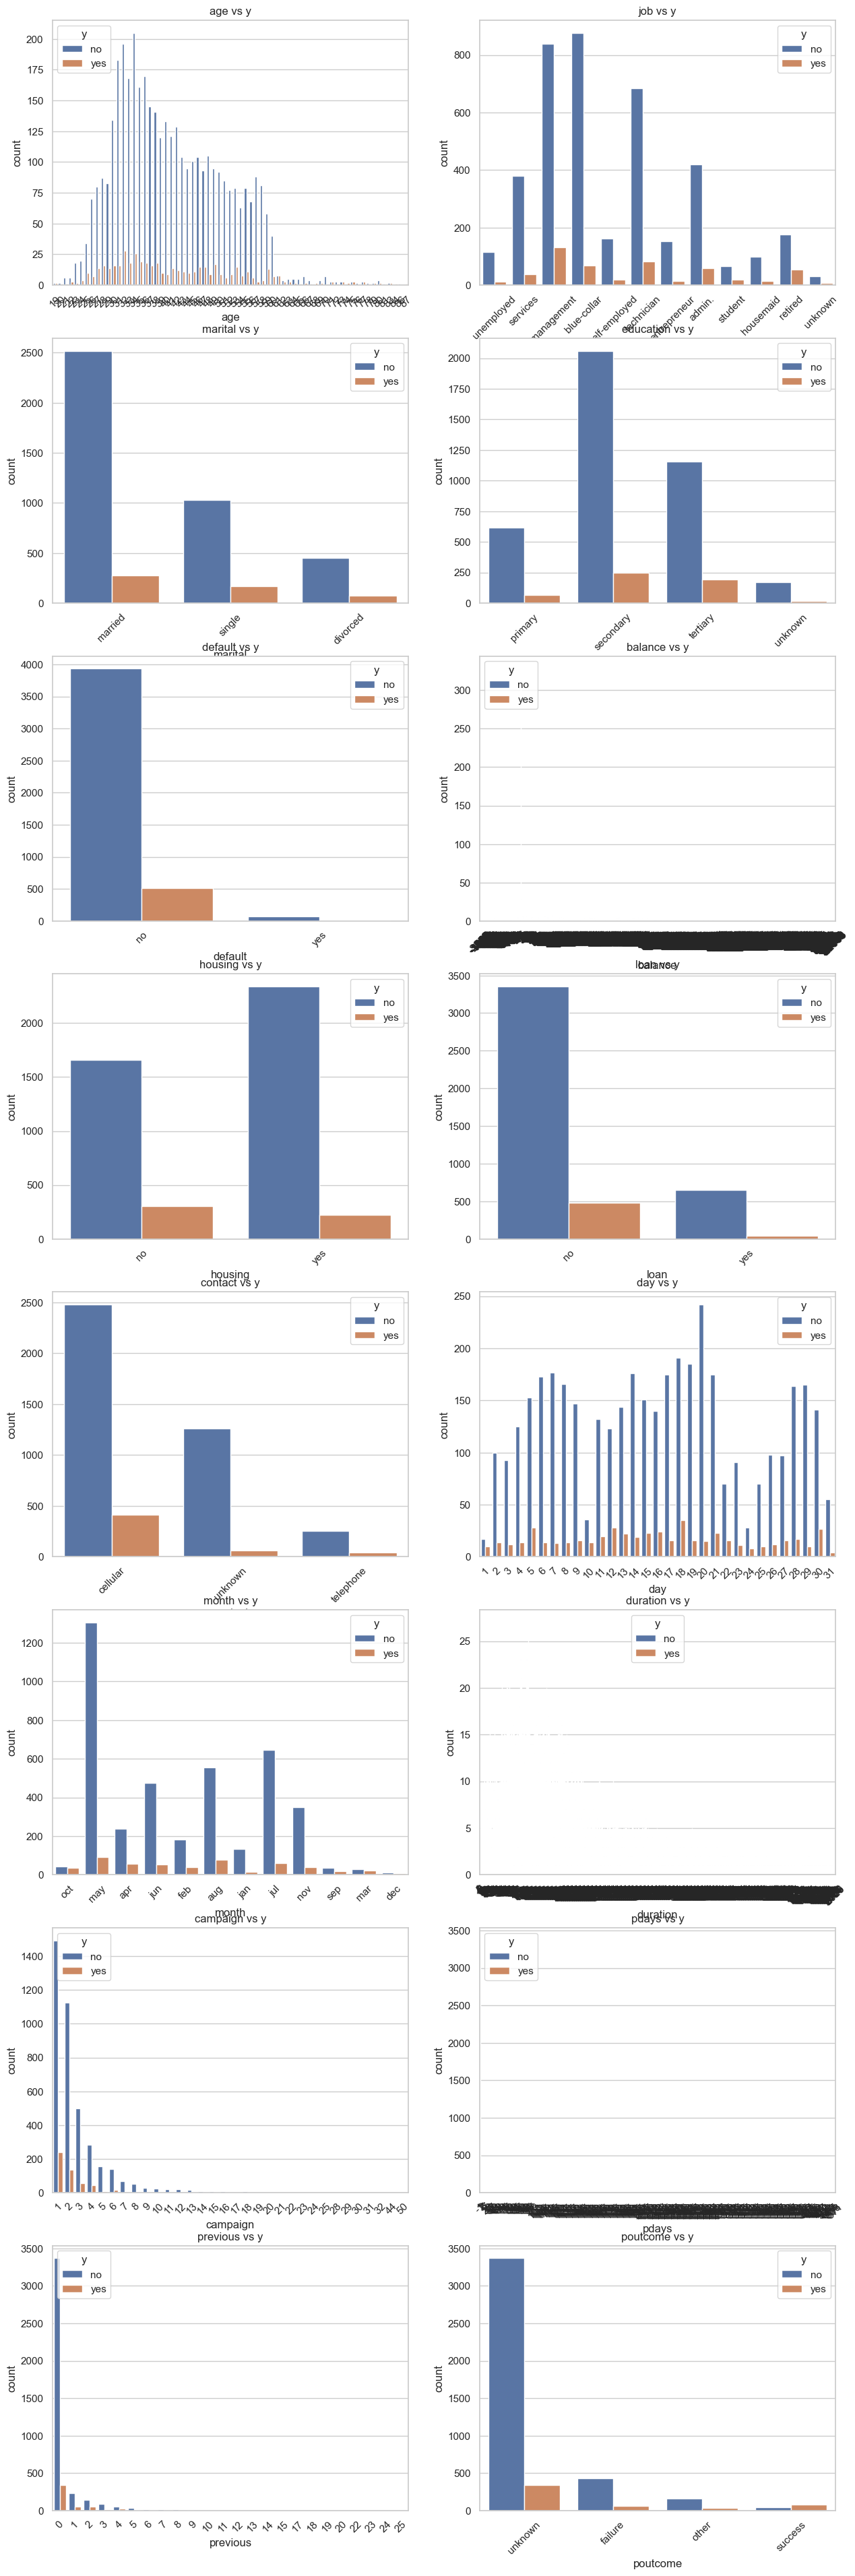

In [5]:
sns.set(style="whitegrid")

features_to_visualize = ['age', 'job', 'marital', 'education', 'default',
                         'balance', 'housing', 'loan', 'contact', 'day',
                         'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

num_rows = len(features_to_visualize) // 2 + len(features_to_visualize) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 6))
axes = axes.flatten()

for i, feature in enumerate(features_to_visualize):
    sns.countplot(data=data, x=feature, hue='y', ax=axes[i])
    axes[i].set_title(f'{feature} vs y')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

#plt.tight_layout()
plt.show()

In [6]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
correlation_matrix = data.corr()

In [8]:
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.083820 -0.017853 -0.002367 -0.005148 -0.008894 -0.003511
balance   0.083820  1.000000 -0.008677 -0.015950 -0.009976  0.009437  0.026196
day      -0.017853 -0.008677  1.000000 -0.024629  0.160706 -0.094352 -0.059114
duration -0.002367 -0.015950 -0.024629  1.000000 -0.068382  0.010380  0.018080
campaign -0.005148 -0.009976  0.160706 -0.068382  1.000000 -0.093137 -0.067833
pdays    -0.008894  0.009437 -0.094352  0.010380 -0.093137  1.000000  0.577562
previous -0.003511  0.026196 -0.059114  0.018080 -0.067833  0.577562  1.000000


In [9]:
approved = data[data['y'] == 'yes']
denied = data[data['y'] == 'no']

In [10]:
for feature in data.columns:
    if feature != 'y':
        unique_values = data[feature].unique()
        
        # If the feature is categorical 
        if np.issubdtype(data[feature].dtype, object):
            contingency_table = pd.crosstab(data[feature], data['y'])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            print(f"Feature: {feature}")
            print(f"Chi-squared: {chi2}")
            print(f"P-value: {p}")
            print("")

        # If the feature is numeric
        else:
            feature_approved = approved[feature]
            feature_denied = denied[feature]
            t_statistic, p_value = ttest_ind(feature_approved, feature_denied)
            print(f"Feature: {feature}")
            print(f"T-statistic: {t_statistic}")
            print(f"P-value: {p_value}")
            print("")

Feature: age
T-statistic: 3.034315524024384
P-value: 0.002424535817380578

Feature: job
Chi-squared: 68.98828575267176
P-value: 1.901391096662705e-10

Feature: marital
Chi-squared: 19.03005634409817
P-value: 7.373535401823763e-05

Feature: education
Chi-squared: 15.236579554873757
P-value: 0.001625240003630989

Feature: default
Chi-squared: 0.0
P-value: 1.0

Feature: balance
T-statistic: 1.2038365069717434
P-value: 0.22871583038630486

Feature: housing
Chi-squared: 48.88462833144263
P-value: 2.7146998959323014e-12

Feature: loan
Chi-squared: 21.87182161746215
P-value: 2.9148288298428256e-06

Feature: contact
Chi-squared: 87.86985650165812
P-value: 8.30430129641147e-20

Feature: day
T-statistic: -0.7559228870961691
P-value: 0.44973483173399975

Feature: month
Chi-squared: 250.50006340911358
P-value: 2.195354833570811e-47

Feature: duration
T-statistic: 29.436469891173097
P-value: 2.1504449021625194e-174

Feature: campaign
T-statistic: -4.11825110915871
P-value: 3.88579357120783e-05

Fea

In [11]:
unique_job = data['job'].unique()
unique_marital = data['marital'].unique()
unique_education = data['education'].unique()
unique_default = data['default'].unique()
unique_housing = data['housing'].unique()
unique_loan = data['loan'].unique()
unique_contact = data['contact'].unique()
unique_month = data['month'].unique()
unique_poutcome = data['poutcome'].unique()

In [12]:
k=0
for i in unique_job :
    data['job'] = data['job'].replace(i,k)
    k=k+1
k=0
for i in unique_marital :
    data['marital'] = data['marital'].replace(i,k)
    k=k+1
k=0
for i in unique_education :
    data['education'] = data['education'].replace(i,k)
    k=k+1
k=0
for i in unique_default :
    data['default'] = data['default'].replace(i,k)
    k=k+1
k=0
for i in unique_housing :
    data['housing'] = data['housing'].replace(i,k)
    k=k+1
k=0
for i in unique_loan :
    data['loan'] = data['loan'].replace(i,k)
    k=k+1
k=0
for i in unique_contact :
    data['contact'] = data['contact'].replace(i,k)
    k=k+1
k=0
for i in unique_month :
    data['month'] = data['month'].replace(i,k)
    k=k+1
k=0
for i in unique_poutcome :
    data['poutcome'] = data['poutcome'].replace(i,k)
    k=k+1

In [13]:
X = data.drop('y', axis=1)
y = data['y']


model = LogisticRegression()
model.fit(X, y)
feature_importance = model.coef_[0]


print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importances:
age: -0.02599968267997001
job: -0.07198506290031764
marital: -0.034830763812777596
education: -0.1628310801359253
default: -0.001693398542690432
balance: 9.760325574213993e-06
housing: -0.43463621871999863
loan: -0.15082808009588017
contact: -0.22058587428460164
day: -0.015080909077508416
month: -0.04083740773020973
duration: 0.003387027643641125
campaign: -0.35448919995380934
pdays: -0.0016523369703643753
previous: 0.11370818461894541
poutcome: 0.4518329196632787


In [14]:
#dropping default and balance
selected_features = ['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']

In [15]:
X = data[selected_features]

In [16]:
y = data['y']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()

In [18]:
rfe = RFE(model, n_features_to_select=7)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=7)

In [19]:
selected_features_rfe = X_train.columns[rfe.support_]

model.fit(X_train[selected_features_rfe], y_train)

y_pred = model.predict(X_test[selected_features_rfe])

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8950276243093923


In [20]:
selected_features_rfe

Index(['marital', 'education', 'housing', 'loan', 'contact', 'campaign',
       'poutcome'],
      dtype='object')

In [21]:
numerical_features = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

In [22]:
correlation_matrix = data.corr()

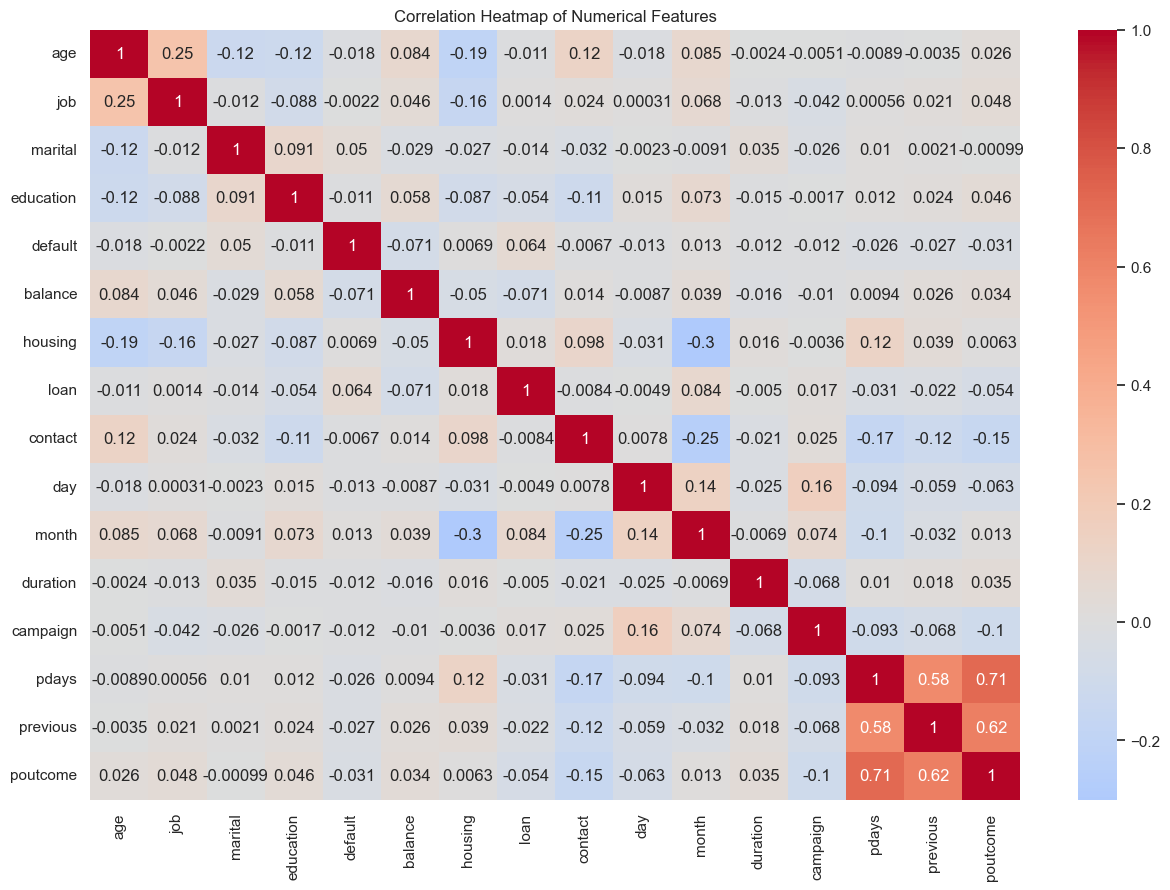

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()